In [2]:
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeatur
%matplotlib inline

In [4]:
#获取各类型植被12个月份的b
global df_b
df_b=pd.DataFrame()
df_b['month']=[1,2,3,4,5,6,7,8,9,10,11,12]


names=["CRO","CSH","DBF","DBF_S","DNF","EBF","EBF_S","ENF","ENF_S","GRA","GRA_S","MF","MF_S","OSH",
     "SAV", "SAV_S","WET","WET_S","WSA","WSA_S"]

for name in names:    
    df=pd.read_csv("Fluxnet/all/"+name+"_b.csv")
    df_b.insert(1,name,df['mean'])

In [5]:
df_b

,month,WSA_S,WSA,WET_S,WET,SAV_S,SAV,OSH,MF_S,MF,...,GRA,ENF_S,ENF,EBF_S,EBF,DNF,DBF_S,DBF,CSH,CRO
0,1,1.077143,2.325250,0.129994,-5.337767,1.360295,4.310794,2.245853,1.793057,1.198728,...,0.462430,-0.104264,0.717673,0.550411,0.038635,2.850633,0.213270,2.265972,0.598827,-2.852851
1,2,0.987961,2.928560,0.071437,0.411572,2.056290,4.080667,2.789318,1.433875,1.183511,...,0.683370,-0.156447,2.225754,0.495513,0.509768,2.556012,1.170048,2.536278,0.800418,-1.203202
2,3,1.183904,2.975346,0.069273,-0.899641,1.784654,4.208136,2.922468,2.025337,1.443699,...,0.770966,-0.128117,1.919030,0.461619,0.666469,4.512229,0.128183,2.692943,1.001862,-0.328586
3,4,1.218095,2.935671,0.065730,0.506607,1.898202,3.784188,3.503219,2.617132,1.067520,...,0.740025,-0.117083,1.433357,0.451571,0.761149,3.554655,1.241063,1.841047,0.926181,0.997815
4,5,1.352954,2.925110,0.161856,0.360444,2.011501,2.805764,3.691683,2.071162,0.611802,...,0.851624,-0.150067,0.983231,0.309683,0.696785,1.945904,0.660171,0.999997,1.013142,0.588280
5,6,1.968399,3.674925,0.144477,0.497002,3.373834,1.469133,4.014319,1.734411,0.309540,...,1.040098,-0.383591,0.689545,0.344597,0.723644,0.536468,1.455825,0.346917,1.054760,0.558057
6,7,2.383820,2.378027,0.237153,0.377616,4.299207,0.526070,2.740742,3.534498,0.192754,...,1.080073,-0.336754,0.606282,0.365826,0.836996,0.246876,2.215689,0.187306,1.265548,0.407851
7,8,1.579437,3.281307,0.277428,0.267210,4.604126,0.241504,2.820999,3.050639,0.163918,...,1.022896,-0.376355,0.712742,0.422493,0.778723,0.459234,1.114955,0.266220,1.502575,0.359292
8,9,1.766286,3.886222,0.357944,0.106936,5.696433,0.270320,2.410009,2.060558,0.258549,...,1.068958,-0.373376,0.861328,0.613011,0.679201,1.007440,1.259298,0.367195,1.090373,0.412559
9,10,2.733147,4.405744,0.542777,-0.667310,4.866827,0.881449,2.482942,1.546957,0.423704,...,0.858343,-0.259182,0.757133,0.637811,0.385455,1.959124,1.068107,0.711248,0.616752,0.399841


In [6]:
df_b.to_csv("folder/不同植被类型12月份的b值.csv")

In [7]:
df=df_b

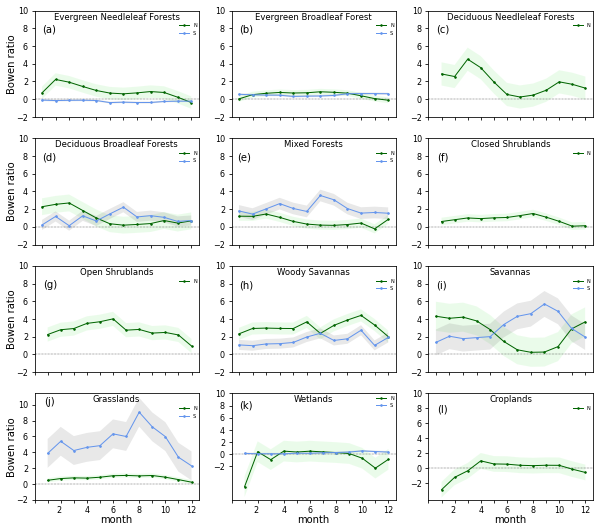

In [8]:
typename=['ENF','EBF','DNF','DBF','MF','CSH','OSH','WSA','SAV','GRA','WET','CRO']
title=['Evergreen Needleleaf Forests','Evergreen Broadleaf Forest','Deciduous Needleleaf Forests','Deciduous Broadleaf Forests','Mixed Forests','Closed Shrublands','Open Shrublands','Woody Savannas','Savannas','Grasslands','Wetlands','Croplands']
typename_S=['ENF_S','EBF_S','DBF_S','MF_S','WSA_S','SAV_S''GRA_S','WET_S']
order=['a','b','c','d','e','f','g','h','i','j','k','l']


fig, axes = plt.subplots(4,3,figsize=(10,9))
#fig.suptitle('Bowen ratio')  

#画出植被北半球的12个图
for i in range(4):
    for j in range(3):
        axes[i][j].axhline(0,linestyle='-.', color='k',  linewidth=0.3)  
        axes[i][j].plot(df['month'], df[typename[i*3+j]], linestyle='-', color='darkgreen',marker='o', markersize=1.5, linewidth=1, label = "N")
        axes[i][j].set_title(title[i*3+j],fontsize=8.5,loc='center',y=0.86)
        axes[i][j].fill_between(df['month'],df[typename[i*3+j]]-df[typename[i*3+j]].std(),df[typename[i*3+j]]+df[typename[i*3+j]].std(),facecolor='lightgreen', alpha=0.18)
        
        axes[i][j].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        axes[i][j].set_xticklabels('')
        axes[i][j].tick_params(labelsize=8,length=3)
        axes[i][j].legend(loc=1,frameon=False,fontsize=5,bbox_to_anchor=(1.001,0.9),borderaxespad = 0)


#由于数据缺失，画出植被南半球的8个图
def DrawS(m,n,nam):
    axes[m][n].plot(df['month'], df[nam], linestyle='-', color='cornflowerblue',marker='o', markersize=1.6, linewidth=1, label = "S")
    axes[m][n].fill_between(df['month'],df[nam]-df[nam].std(),df[nam]+df[nam].std(),facecolor='gray', alpha=0.18)
    axes[m][n].legend(loc=1,frameon=False,fontsize=5,bbox_to_anchor=(1.001,0.9),borderaxespad = 0)
    
DrawS(0,0,'ENF_S')
DrawS(0,1,'EBF_S')
DrawS(1,0,'DBF_S')
DrawS(1,1,'MF_S')
DrawS(2,1,'WSA_S')
DrawS(2,2,'SAV_S')
DrawS(3,0,'GRA_S')
DrawS(3,1,'WET_S')


#设置轴标题
for i in range(4):
    axes[i][0].set_ylabel("Bowen ratio",labelpad=-1,fontsize=10)

for i in range(3):
    axes[3][i].set_xlabel("month",labelpad=-0.5,fontsize=10)
    

#设置轴刻度及大小
for i in range(4):
    for j in range(3):
        axes[i][j].set_yticks([-2,0,2,4,6,8,10])
        axes[3][j].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        axes[3][j].set_xticklabels([' ', ' ', '2 ', ' ','4',' ', '6', ' ','8', ' ', '10',' ', '12'], rotation=0)
        axes[3][j].tick_params(labelsize=8,length=3)
        
#调整个别特殊图坐标刻度
#axes[2][2].set_yticks([-8,0,8,16,24,32,40])
axes[3][1].legend(loc=1,frameon=False,fontsize=5,bbox_to_anchor=(1.001,1),borderaxespad = 0)
axes[0][0].text(1,7.5,'(a)',fontsize=10)
axes[0][1].text(1,7.5,'(b)',fontsize=10)
axes[0][2].text(0.6,7.5,'(c)',fontsize=10)
axes[1][0].text(1,7.5,'(d)',fontsize=10)
axes[1][1].text(0.9,7.5,'(e)',fontsize=10)
axes[1][2].text(0.7,7.5,'(f)',fontsize=10)
axes[2][0].text(0.65,7.5,'(g)',fontsize=10)
axes[2][1].text(1,7.5,'(h)',fontsize=10)
axes[2][2].text(1,7.5,'(i)',fontsize=10)
axes[3][0].text(0.7,10,'(j)',fontsize=10)
axes[3][1].text(0.6,7.5,'(k)',fontsize=10)
axes[3][2].text(0.65,7.5,'(l)',fontsize=10)


plt.savefig("folder/图/3.波文比时间差异.jpg",dpi=300, bbox_inches='tight' )
